# Cancer Dedection

In [46]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,mean_squared_error,classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [28]:
#Loading dataset
data = pd.read_csv(r"D:\GUVI\casestudy\Project\cancer.csv")

In [29]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
#Encoding the categorical variable and removing dummy variable
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
data = data.set_index('id')
del data['Unnamed: 32']

<AxesSubplot:>

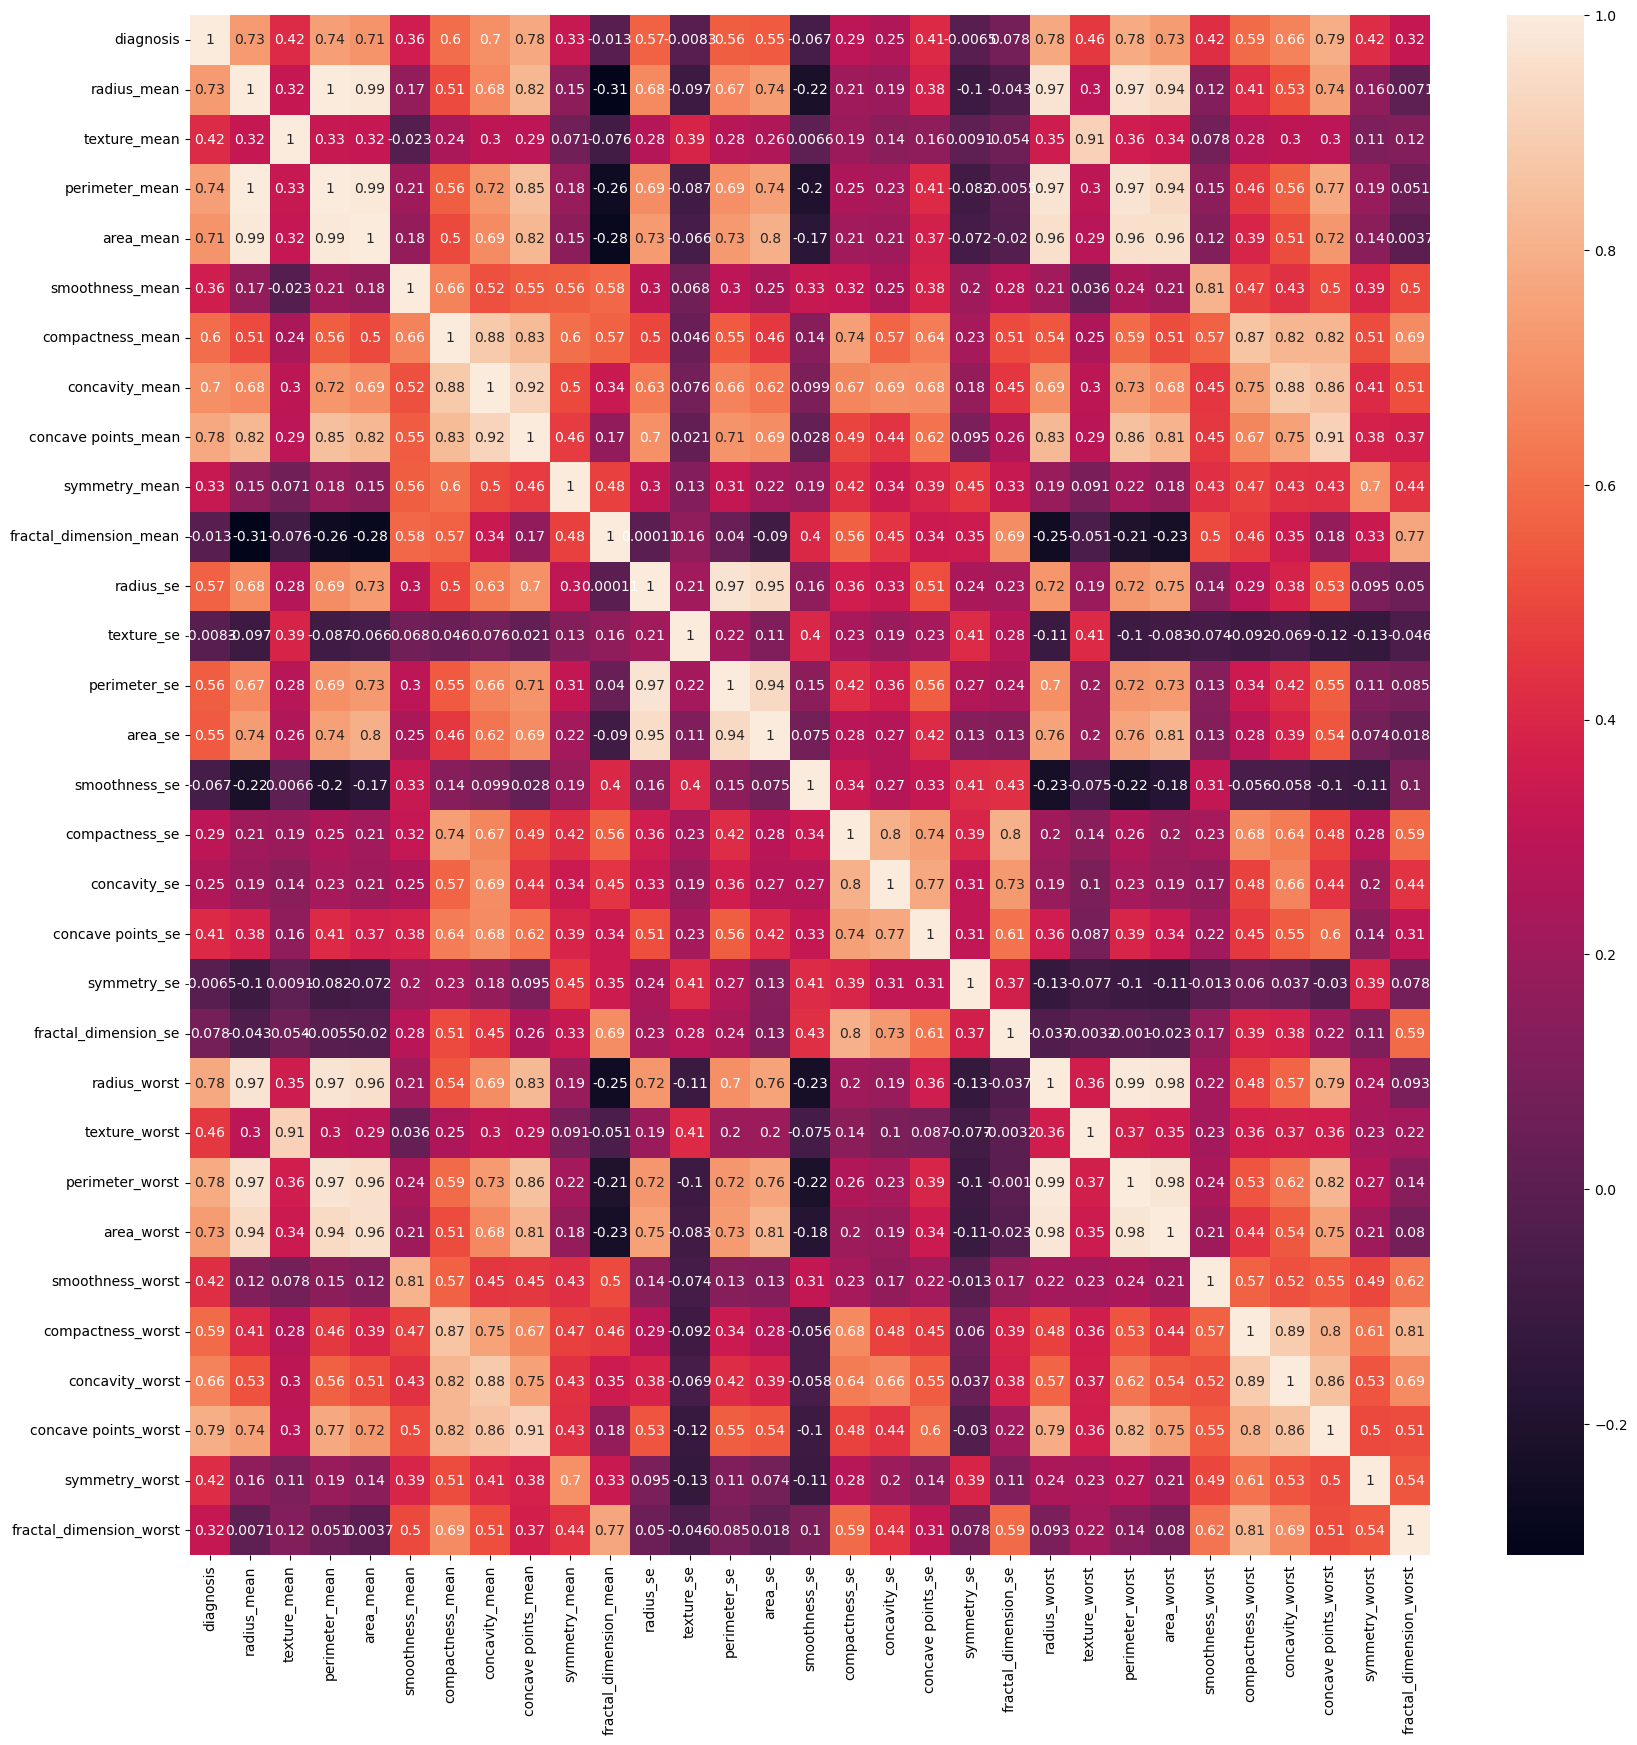

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

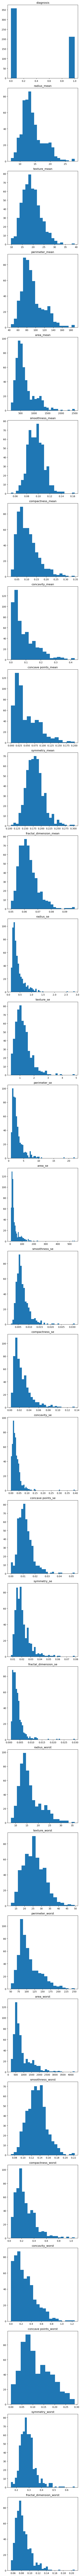

In [34]:
variables = data.columns.tolist()

# Set up the plot
fig, axs = plt.subplots(len(variables), 1, figsize=(5, 5 * len(variables)))

# Plot histograms for each variable
for i, variable in enumerate(variables):
    ax = axs[i]
    ax.hist(data[variable], bins='auto')
    ax.set_title(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plo
plt.show()

<AxesSubplot:xlabel='fractal_dimension_worst', ylabel='Density'>

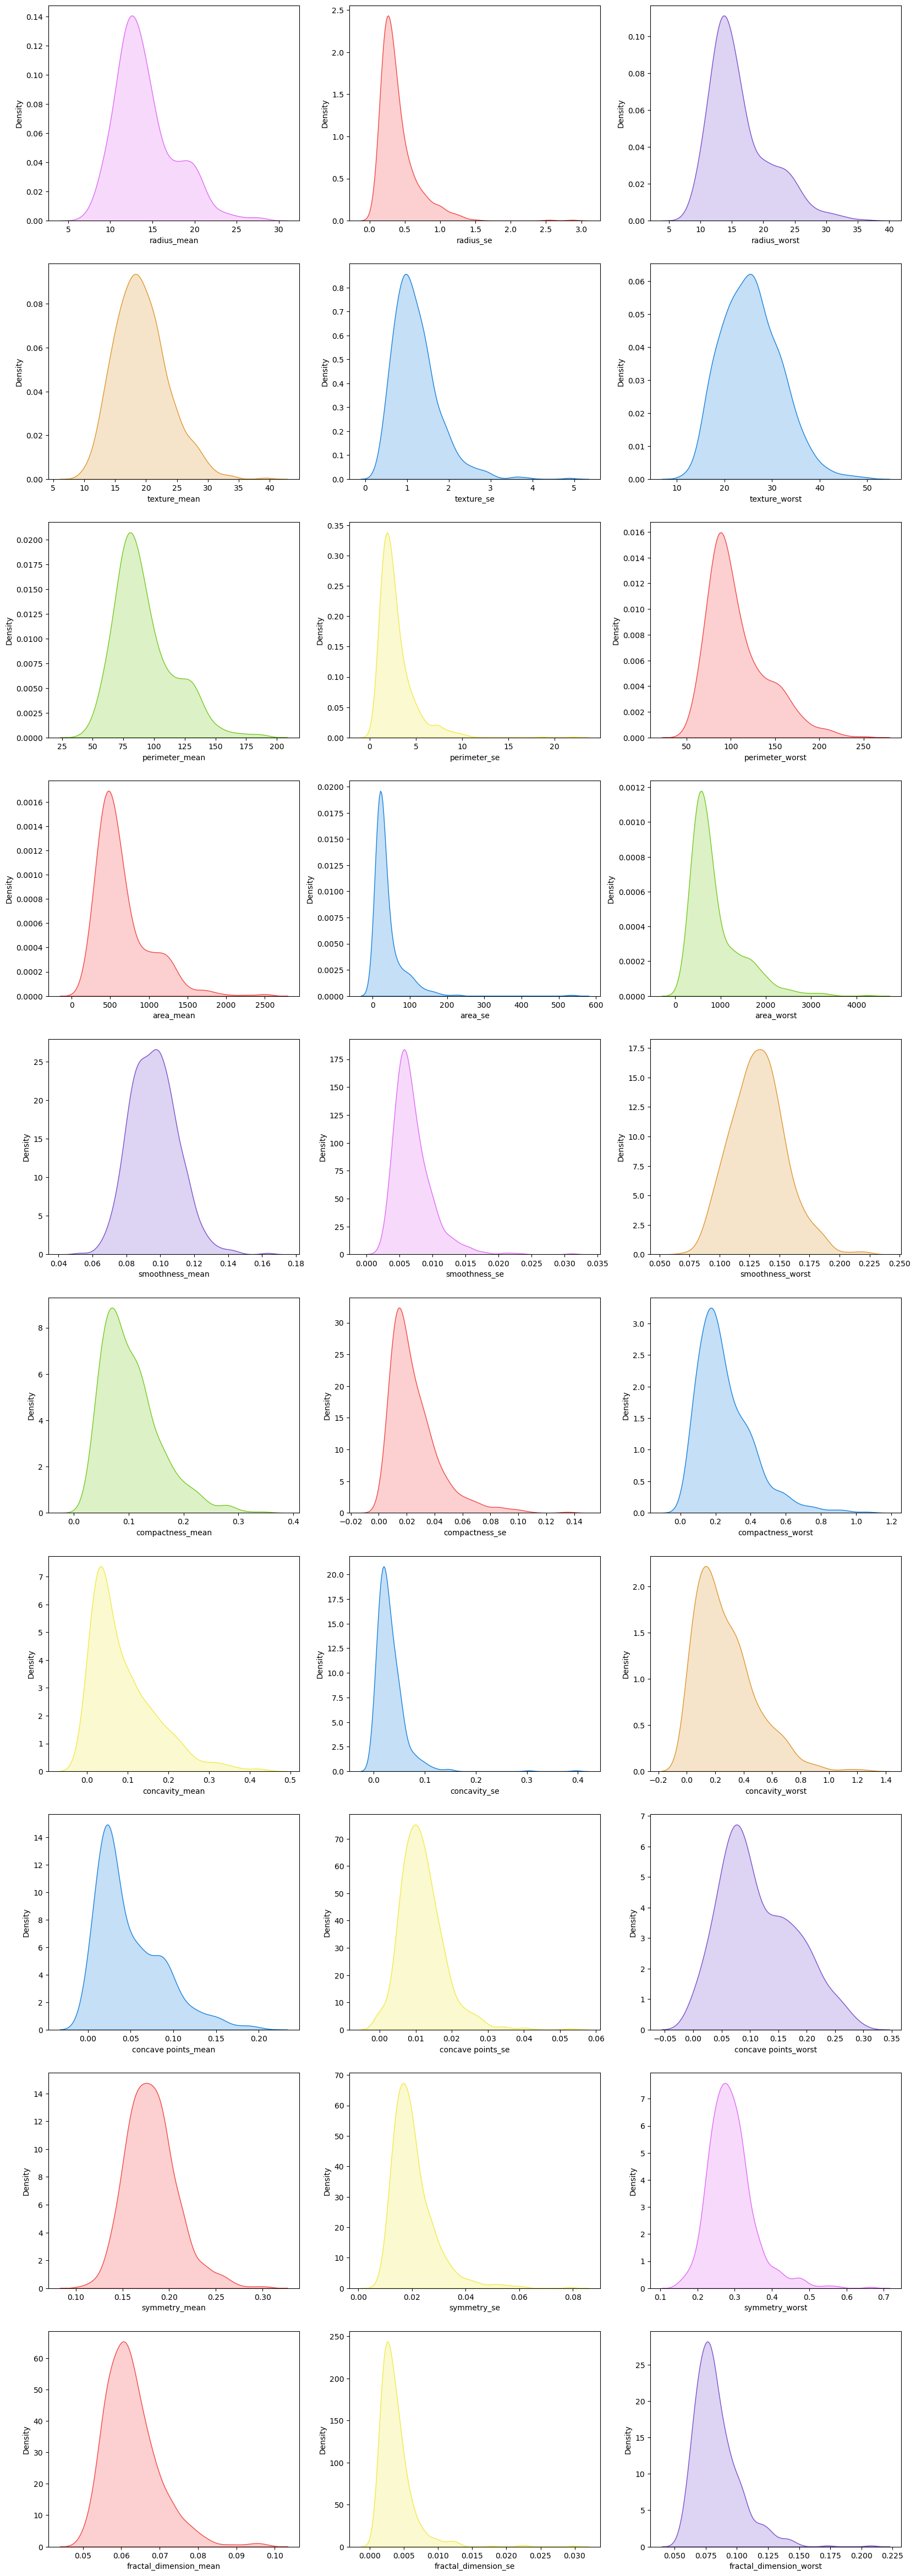

In [35]:
#Plotting the distributions of the numerical variables

color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc']

fig,ax = plt.subplots(10,3,figsize=(20,60))
sns.kdeplot(data['radius_mean'],color=np.random.choice(color_plot), ax=ax[0][0], shade=True)
sns.kdeplot(data['texture_mean'],color=np.random.choice(color_plot), ax=ax[1][0], shade=True)
sns.kdeplot(data['perimeter_mean'],color=np.random.choice(color_plot), ax=ax[2][0], shade=True)
sns.kdeplot(data['area_mean'],color=np.random.choice(color_plot), ax=ax[3][0], shade=True)
sns.kdeplot(data['smoothness_mean'],color=np.random.choice(color_plot), ax=ax[4][0], shade=True)
sns.kdeplot(data['compactness_mean'],color=np.random.choice(color_plot), ax=ax[5][0], shade=True)
sns.kdeplot(data['concavity_mean'],color=np.random.choice(color_plot), ax=ax[6][0], shade=True)
sns.kdeplot(data['concave points_mean'],color=np.random.choice(color_plot), ax=ax[7][0], shade=True)
sns.kdeplot(data['symmetry_mean'],color=np.random.choice(color_plot), ax=ax[8][0], shade=True)
sns.kdeplot(data['fractal_dimension_mean'],color=np.random.choice(color_plot), ax=ax[9][0], shade=True)
sns.kdeplot(data['radius_se'],color=np.random.choice(color_plot), ax=ax[0][1], shade=True)
sns.kdeplot(data['texture_se'],color=np.random.choice(color_plot), ax=ax[1][1], shade=True)
sns.kdeplot(data['perimeter_se'],color=np.random.choice(color_plot), ax=ax[2][1], shade=True)
sns.kdeplot(data['area_se'],color=np.random.choice(color_plot), ax=ax[3][1], shade=True)
sns.kdeplot(data['smoothness_se'],color=np.random.choice(color_plot), ax=ax[4][1], shade=True)
sns.kdeplot(data['compactness_se'],color=np.random.choice(color_plot), ax=ax[5][1], shade=True)
sns.kdeplot(data['concavity_se'],color=np.random.choice(color_plot), ax=ax[6][1], shade=True)
sns.kdeplot(data['concave points_se'],color=np.random.choice(color_plot), ax=ax[7][1], shade=True)
sns.kdeplot(data['symmetry_se'],color=np.random.choice(color_plot), ax=ax[8][1], shade=True)
sns.kdeplot(data['fractal_dimension_se'],color=np.random.choice(color_plot), ax=ax[9][1], shade=True)
sns.kdeplot(data['radius_worst'],color=np.random.choice(color_plot), ax=ax[0][2], shade=True)
sns.kdeplot(data['texture_worst'],color=np.random.choice(color_plot), ax=ax[1][2], shade=True)
sns.kdeplot(data['perimeter_worst'],color=np.random.choice(color_plot), ax=ax[2][2], shade=True)
sns.kdeplot(data['area_worst'],color=np.random.choice(color_plot), ax=ax[3][2], shade=True)
sns.kdeplot(data['smoothness_worst'],color=np.random.choice(color_plot), ax=ax[4][2], shade=True)
sns.kdeplot(data['compactness_worst'],color=np.random.choice(color_plot), ax=ax[5][2], shade=True)
sns.kdeplot(data['concavity_worst'],color=np.random.choice(color_plot), ax=ax[6][2], shade=True)
sns.kdeplot(data['concave points_worst'],color=np.random.choice(color_plot), ax=ax[7][2], shade=True)
sns.kdeplot(data['symmetry_worst'],color=np.random.choice(color_plot), ax=ax[8][2],shade=True)
sns.kdeplot(data['fractal_dimension_worst'],color=np.random.choice(color_plot), ax=ax[9][2], shade=True)


In [37]:
#selecting features and target
X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

Without Standardization

In [39]:
#Splitting Traing and Test data
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=5)

In [40]:
# Fitting SVC Model
classifier = SVC(kernel='linear',random_state=5)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=5)

In [41]:
#Predicting the test set result
y_test_pred= classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)

In [43]:
#Creating the Confusion matrix  
confusion_matrix(y_test, y_test_pred)

array([[108,   2],
       [  1,  60]], dtype=int64)

In [50]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label=1)
recall = recall_score(y_test, y_test_pred, pos_label=1)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
auc_roc = roc_auc_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.9824561403508771
Precision: 0.967741935483871
Recall: 0.9836065573770492
F1-score: 0.975609756097561
AUC-ROC: 0.9827123695976155


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.97      0.98      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



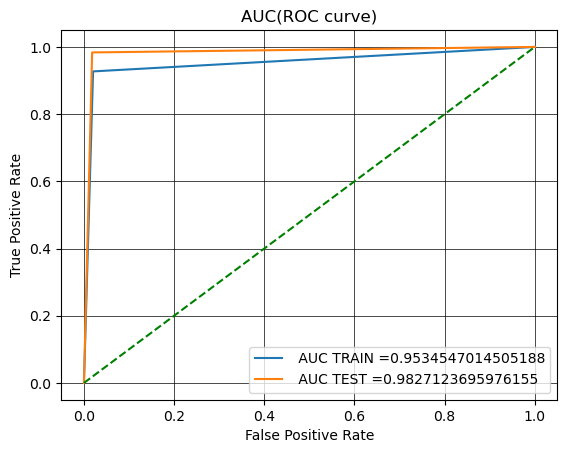

In [51]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

With Standardization

In [58]:
# standardizing
st_x= StandardScaler()    
x_train_scaled= st_x.fit_transform(x_train)    
x_test_scaled= st_x.transform(x_test)    

In [59]:
#Fitting the model
classifier = SVC(kernel='linear', random_state=5)  
classifier.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=5)

In [64]:
# Predicting the model
y_test_pred_scaled= classifier.predict(x_test_scaled)  
y_train_pred_scaled= classifier.predict(x_train_scaled)

In [65]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_test_pred_scaled)
precision = precision_score(y_test, y_test_pred_scaled, pos_label=1)
recall = recall_score(y_test, y_test_pred_scaled, pos_label=1)
f1 = f1_score(y_test, y_test_pred_scaled, pos_label=1)
auc_roc = roc_auc_score(y_test, y_test_pred_scaled)

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.9824561403508771
Precision: 0.9833333333333333
Recall: 0.9672131147540983
F1-score: 0.9752066115702478
AUC-ROC: 0.9790611028315946


In [66]:
#Creating the Confusion matrix  
confusion_matrix(y_test, y_pred_scaled)

array([[109,   1],
       [  2,  59]], dtype=int64)

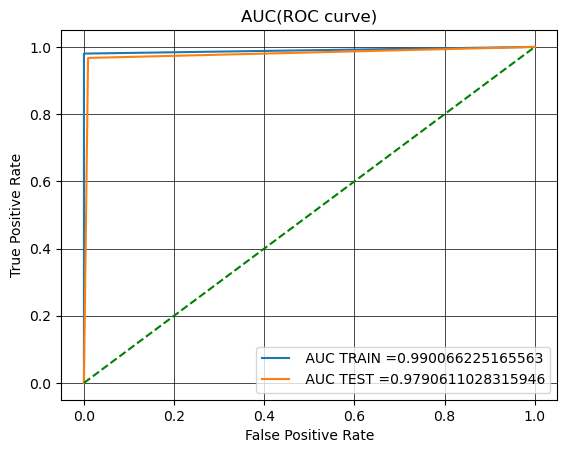

In [69]:
#AUC ROC curve
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_scaled)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_scaled)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Hyperparameter tuning

In [76]:
classifier = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(classifier,param_grid)

In [77]:
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [78]:
grid_svc = grid.predict(x_test_scaled)
accuracy_score(y_test,grid_svc)

0.9824561403508771

In [79]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [80]:
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.98      0.97      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [81]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, grid_svc)
precision = precision_score(y_test, grid_svc, pos_label=1)
recall = recall_score(y_test, grid_svc, pos_label=1)
f1 = f1_score(y_test, grid_svc, pos_label=1)
auc_roc = roc_auc_score(y_test, grid_svc)

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.9824561403508771
Precision: 0.9833333333333333
Recall: 0.9672131147540983
F1-score: 0.9752066115702478
AUC-ROC: 0.9790611028315946
